# Example 1

### import dependencies

In [1]:
import sys
import os

# Get the root project folder
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Add the src folder to sys.path
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

import yaml
from elec_pinn.data.preprocessing import Preprocessor     
from elec_pinn.data.loader import ScalerLoader     
from elec_pinn.cli import load_config, get_model
from elec_pinn.utils.visualization import plot_pinn_performance 

### Load configurations


In [2]:
cfg = load_config("example1_config.yaml")

### Preprocess data

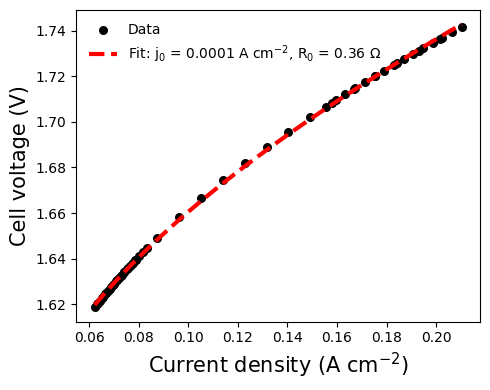

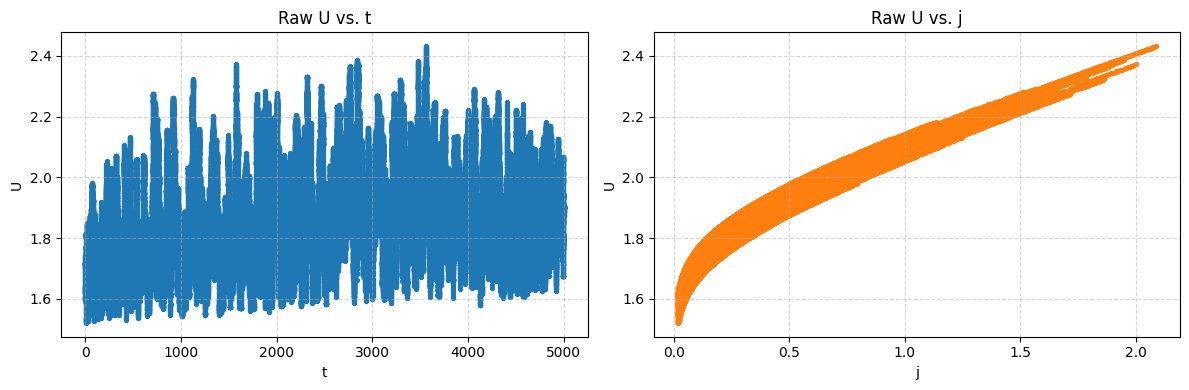

In [3]:
dp = Preprocessor(cfg["data"]["dataset_name"])
df = dp.preprocess(
                    t0 = cfg["data"]["t0"],
                    t1 = cfg["data"]["t1"],
                    plot_fit = True,   # show the performance fit curve
                    plot_raw = True   # show raw data over time
                  )

### Instantiate scaler
ScalerLoader handles scaling of data and converts it to Torch dataloaders that are split into the fractions specified in the .yaml configurations file

In [4]:


scaler = ScalerLoader(
                feature_cols=cfg["data"]["feature_names"],
                target_cols=cfg["data"]["target_names"],
                scale_range=tuple(cfg["data"]["scale_range"]) 
                     ).fit(df)


train_loader, val_loader, test_loader, all_loader = scaler.get_loaders(
    df,
    f_train=cfg["data"]["train_frac"],
    f_val=  cfg["data"]["val_frac"],
    f_test=1 - cfg["data"]["train_frac"] - cfg["data"]["val_frac"],
    batch_sizes=tuple(cfg["training"]["batch_sizes"])
)

### Instantiate PINN and train

In [5]:
model   = get_model(cfg)
training_results = model.train_model( train_loader, 
                                      val_loader,
                                      cfg['training']['epochs'],
                                      cfg['training']['save_freq'],
                                      cfg['training']['patience'])

Epoch 1 | Train: 1.189587, Val: 1.109447:   0%|▌                                                                                                                        | 1/200 [00:01<03:43,  1.12s/it]

Epoch 1: New best model saved! Loss: 1.1094473650


Epoch 2 | Train: 0.975571, Val: 0.907601:   1%|█▏                                                                                                                       | 2/200 [00:02<03:37,  1.10s/it]

Epoch 2: New best model saved! Loss: 0.9076010957


Epoch 3 | Train: 0.793443, Val: 0.736481:   2%|█▊                                                                                                                       | 3/200 [00:03<03:43,  1.13s/it]

Epoch 3: New best model saved! Loss: 0.7364810581


Epoch 4 | Train: 0.639625, Val: 0.592550:   2%|██▍                                                                                                                      | 4/200 [00:04<03:54,  1.20s/it]

Epoch 4: New best model saved! Loss: 0.5925498431


Epoch 5 | Train: 0.510871, Val: 0.472723:   2%|███                                                                                                                      | 5/200 [00:05<03:37,  1.12s/it]

Epoch 5: New best model saved! Loss: 0.4727230507


Epoch 6 | Train: 0.404260, Val: 0.374309:   3%|███▋                                                                                                                     | 6/200 [00:06<03:28,  1.07s/it]

Epoch 6: New best model saved! Loss: 0.3743089288


Epoch 7 | Train: 0.317228, Val: 0.294778:   4%|████▏                                                                                                                    | 7/200 [00:07<03:20,  1.04s/it]

Epoch 7: New best model saved! Loss: 0.2947777640


Epoch 8 | Train: 0.247290, Val: 0.231564:   4%|████▊                                                                                                                    | 8/200 [00:08<03:14,  1.01s/it]

Epoch 8: New best model saved! Loss: 0.2315640685


Epoch 9 | Train: 0.192113, Val: 0.182303:   4%|█████▍                                                                                                                   | 9/200 [00:09<03:08,  1.01it/s]

Epoch 9: New best model saved! Loss: 0.1823025718


Epoch 10 | Train: 0.149384, Val: 0.144611:   5%|█████▉                                                                                                                 | 10/200 [00:10<03:26,  1.09s/it]

Epoch 10: New best model saved! Loss: 0.1446113962


Epoch 11 | Train: 0.116832, Val: 0.116265:   6%|██████▌                                                                                                                | 11/200 [00:12<03:52,  1.23s/it]

Epoch 11: New best model saved! Loss: 0.1162651504


Epoch 12 | Train: 0.092410, Val: 0.095177:   6%|███████▏                                                                                                               | 12/200 [00:13<04:05,  1.30s/it]

Epoch 12: New best model saved! Loss: 0.0951768157


Epoch 13 | Train: 0.074315, Val: 0.079533:   6%|███████▋                                                                                                               | 13/200 [00:14<03:53,  1.25s/it]

Epoch 13: New best model saved! Loss: 0.0795326947


Epoch 14 | Train: 0.060915, Val: 0.067930:   7%|████████▎                                                                                                              | 14/200 [00:16<03:44,  1.21s/it]

Epoch 14: New best model saved! Loss: 0.0679300704


Epoch 15 | Train: 0.051000, Val: 0.059203:   8%|████████▉                                                                                                              | 15/200 [00:17<03:40,  1.19s/it]

Epoch 15: New best model saved! Loss: 0.0592029835


Epoch 16 | Train: 0.043559, Val: 0.052533:   8%|█████████▌                                                                                                             | 16/200 [00:18<03:24,  1.11s/it]

Epoch 16: New best model saved! Loss: 0.0525331347


Epoch 17 | Train: 0.037882, Val: 0.047230:   8%|██████████                                                                                                             | 17/200 [00:19<03:22,  1.11s/it]

Epoch 17: New best model saved! Loss: 0.0472300901


Epoch 18 | Train: 0.033448, Val: 0.042956:   9%|██████████▋                                                                                                            | 18/200 [00:20<03:22,  1.11s/it]

Epoch 18: New best model saved! Loss: 0.0429555438


Epoch 19 | Train: 0.029862, Val: 0.039351:  10%|███████████▎                                                                                                           | 19/200 [00:21<03:22,  1.12s/it]

Epoch 19: New best model saved! Loss: 0.0393510649


Epoch 20 | Train: 0.026838, Val: 0.036264:  10%|███████████▉                                                                                                           | 20/200 [00:22<03:14,  1.08s/it]

Epoch 20: New best model saved! Loss: 0.0362638458


Epoch 21 | Train: 0.024306, Val: 0.033546:  10%|████████████▍                                                                                                          | 21/200 [00:23<03:07,  1.05s/it]

Epoch 21: New best model saved! Loss: 0.0335455691


Epoch 22 | Train: 0.022066, Val: 0.031101:  11%|█████████████                                                                                                          | 22/200 [00:24<03:01,  1.02s/it]

Epoch 22: New best model saved! Loss: 0.0311013032


Epoch 23 | Train: 0.020100, Val: 0.028901:  12%|█████████████▋                                                                                                         | 23/200 [00:25<02:59,  1.01s/it]

Epoch 23: New best model saved! Loss: 0.0289008373


Epoch 24 | Train: 0.018323, Val: 0.026897:  12%|██████████████▎                                                                                                        | 24/200 [00:26<02:55,  1.00it/s]

Epoch 24: New best model saved! Loss: 0.0268973850


Epoch 25 | Train: 0.016708, Val: 0.025054:  12%|██████████████▉                                                                                                        | 25/200 [00:27<02:52,  1.02it/s]

Epoch 25: New best model saved! Loss: 0.0250543845


Epoch 26 | Train: 0.015267, Val: 0.023385:  13%|███████████████▍                                                                                                       | 26/200 [00:28<02:51,  1.01it/s]

Epoch 26: New best model saved! Loss: 0.0233854358


Epoch 27 | Train: 0.013933, Val: 0.021841:  14%|████████████████                                                                                                       | 27/200 [00:29<02:47,  1.03it/s]

Epoch 27: New best model saved! Loss: 0.0218406443


Epoch 28 | Train: 0.012710, Val: 0.020416:  14%|████████████████▋                                                                                                      | 28/200 [00:30<02:48,  1.02it/s]

Epoch 28: New best model saved! Loss: 0.0204156163


Epoch 29 | Train: 0.011583, Val: 0.019140:  14%|█████████████████▎                                                                                                     | 29/200 [00:31<02:46,  1.03it/s]

Epoch 29: New best model saved! Loss: 0.0191396013


Epoch 30 | Train: 0.010576, Val: 0.017948:  15%|█████████████████▊                                                                                                     | 30/200 [00:32<02:44,  1.03it/s]

Epoch 30: New best model saved! Loss: 0.0179475274


Epoch 31 | Train: 0.009639, Val: 0.016853:  16%|██████████████████▍                                                                                                    | 31/200 [00:33<02:46,  1.01it/s]

Epoch 31: New best model saved! Loss: 0.0168527878


Epoch 32 | Train: 0.008788, Val: 0.015835:  16%|███████████████████                                                                                                    | 32/200 [00:34<02:44,  1.02it/s]

Epoch 32: New best model saved! Loss: 0.0158345443


Epoch 33 | Train: 0.008011, Val: 0.014950:  16%|███████████████████▋                                                                                                   | 33/200 [00:35<02:41,  1.03it/s]

Epoch 33: New best model saved! Loss: 0.0149495119


Epoch 34 | Train: 0.007290, Val: 0.014107:  17%|████████████████████▏                                                                                                  | 34/200 [00:36<02:44,  1.01it/s]

Epoch 34: New best model saved! Loss: 0.0141068096


Epoch 35 | Train: 0.006649, Val: 0.013354:  18%|████████████████████▊                                                                                                  | 35/200 [00:37<02:46,  1.01s/it]

Epoch 35: New best model saved! Loss: 0.0133542959


Epoch 36 | Train: 0.006066, Val: 0.012640:  18%|█████████████████████▍                                                                                                 | 36/200 [00:38<02:48,  1.03s/it]

Epoch 36: New best model saved! Loss: 0.0126401634


Epoch 37 | Train: 0.005535, Val: 0.012038:  18%|██████████████████████                                                                                                 | 37/200 [00:39<02:49,  1.04s/it]

Epoch 37: New best model saved! Loss: 0.0120375894


Epoch 38 | Train: 0.005059, Val: 0.011476:  19%|██████████████████████▌                                                                                                | 38/200 [00:40<02:53,  1.07s/it]

Epoch 38: New best model saved! Loss: 0.0114759017


Epoch 39 | Train: 0.004632, Val: 0.010967:  20%|███████████████████████▏                                                                                               | 39/200 [00:42<03:24,  1.27s/it]

Epoch 39: New best model saved! Loss: 0.0109674791


Epoch 40 | Train: 0.004244, Val: 0.010482:  20%|███████████████████████▊                                                                                               | 40/200 [00:43<03:31,  1.32s/it]

Epoch 40: New best model saved! Loss: 0.0104821435


Epoch 41 | Train: 0.003896, Val: 0.010082:  20%|████████████████████████▍                                                                                              | 41/200 [00:44<03:18,  1.25s/it]

Epoch 41: New best model saved! Loss: 0.0100816072


Epoch 42 | Train: 0.003587, Val: 0.009710:  21%|████████████████████████▉                                                                                              | 42/200 [00:45<03:15,  1.24s/it]

Epoch 42: New best model saved! Loss: 0.0097097677


Epoch 43 | Train: 0.003313, Val: 0.009361:  22%|█████████████████████████▌                                                                                             | 43/200 [00:46<03:05,  1.18s/it]

Epoch 43: New best model saved! Loss: 0.0093606671


Epoch 44 | Train: 0.003065, Val: 0.009060:  22%|██████████████████████████▏                                                                                            | 44/200 [00:48<02:57,  1.13s/it]

Epoch 44: New best model saved! Loss: 0.0090598665


Epoch 45 | Train: 0.002848, Val: 0.008793:  22%|██████████████████████████▊                                                                                            | 45/200 [00:49<02:53,  1.12s/it]

Epoch 45: New best model saved! Loss: 0.0087925935


Epoch 46 | Train: 0.002654, Val: 0.008555:  23%|███████████████████████████▎                                                                                           | 46/200 [00:50<02:48,  1.09s/it]

Epoch 46: New best model saved! Loss: 0.0085547371


Epoch 47 | Train: 0.002483, Val: 0.008319:  24%|███████████████████████████▉                                                                                           | 47/200 [00:51<02:43,  1.07s/it]

Epoch 47: New best model saved! Loss: 0.0083192854


Epoch 48 | Train: 0.002334, Val: 0.008127:  24%|████████████████████████████▌                                                                                          | 48/200 [00:52<02:42,  1.07s/it]

Epoch 48: New best model saved! Loss: 0.0081271045


Epoch 49 | Train: 0.002200, Val: 0.007967:  24%|█████████████████████████████▏                                                                                         | 49/200 [00:53<02:37,  1.04s/it]

Epoch 49: New best model saved! Loss: 0.0079669007


Epoch 50 | Train: 0.002084, Val: 0.007773:  25%|█████████████████████████████▊                                                                                         | 50/200 [00:54<02:36,  1.04s/it]

Epoch 50: New best model saved! Loss: 0.0077731058


Epoch 51 | Train: 0.001981, Val: 0.007649:  26%|██████████████████████████████▎                                                                                        | 51/200 [00:55<02:36,  1.05s/it]

Epoch 51: New best model saved! Loss: 0.0076486881


Epoch 52 | Train: 0.001891, Val: 0.007516:  26%|██████████████████████████████▉                                                                                        | 52/200 [00:56<02:32,  1.03s/it]

Epoch 52: New best model saved! Loss: 0.0075164641


Epoch 53 | Train: 0.001813, Val: 0.007406:  26%|███████████████████████████████▌                                                                                       | 53/200 [00:57<02:25,  1.01it/s]

Epoch 53: New best model saved! Loss: 0.0074062719


Epoch 54 | Train: 0.001743, Val: 0.007303:  27%|████████████████████████████████▏                                                                                      | 54/200 [00:58<02:22,  1.02it/s]

Epoch 54: New best model saved! Loss: 0.0073032779


Epoch 55 | Train: 0.001682, Val: 0.007194:  28%|████████████████████████████████▋                                                                                      | 55/200 [00:59<02:20,  1.03it/s]

Epoch 55: New best model saved! Loss: 0.0071936046


Epoch 56 | Train: 0.001628, Val: 0.007117:  28%|█████████████████████████████████▎                                                                                     | 56/200 [01:00<02:18,  1.04it/s]

Epoch 56: New best model saved! Loss: 0.0071173849


Epoch 57 | Train: 0.001580, Val: 0.007021:  28%|█████████████████████████████████▉                                                                                     | 57/200 [01:00<02:16,  1.05it/s]

Epoch 57: New best model saved! Loss: 0.0070210919


Epoch 58 | Train: 0.001539, Val: 0.006955:  29%|██████████████████████████████████▌                                                                                    | 58/200 [01:02<02:20,  1.01it/s]

Epoch 58: New best model saved! Loss: 0.0069552639


Epoch 59 | Train: 0.001502, Val: 0.006879:  30%|███████████████████████████████████                                                                                    | 59/200 [01:02<02:15,  1.04it/s]

Epoch 59: New best model saved! Loss: 0.0068791040


Epoch 60 | Train: 0.001468, Val: 0.006814:  30%|███████████████████████████████████▋                                                                                   | 60/200 [01:03<02:11,  1.06it/s]

Epoch 60: New best model saved! Loss: 0.0068140896


Epoch 61 | Train: 0.001439, Val: 0.006742:  30%|████████████████████████████████████▎                                                                                  | 61/200 [01:04<02:10,  1.07it/s]

Epoch 61: New best model saved! Loss: 0.0067418336


Epoch 62 | Train: 0.001412, Val: 0.006675:  31%|████████████████████████████████████▉                                                                                  | 62/200 [01:05<02:09,  1.06it/s]

Epoch 62: New best model saved! Loss: 0.0066745495


Epoch 63 | Train: 0.001387, Val: 0.006628:  32%|█████████████████████████████████████▍                                                                                 | 63/200 [01:06<02:07,  1.07it/s]

Epoch 63: New best model saved! Loss: 0.0066283715


Epoch 64 | Train: 0.001366, Val: 0.006562:  32%|██████████████████████████████████████                                                                                 | 64/200 [01:07<02:06,  1.07it/s]

Epoch 64: New best model saved! Loss: 0.0065621821


Epoch 65 | Train: 0.001345, Val: 0.006508:  32%|██████████████████████████████████████▋                                                                                | 65/200 [01:08<02:06,  1.07it/s]

Epoch 65: New best model saved! Loss: 0.0065079946


Epoch 66 | Train: 0.001327, Val: 0.006466:  33%|███████████████████████████████████████▎                                                                               | 66/200 [01:09<02:04,  1.08it/s]

Epoch 66: New best model saved! Loss: 0.0064662015


Epoch 67 | Train: 0.001310, Val: 0.006415:  34%|███████████████████████████████████████▊                                                                               | 67/200 [01:10<02:08,  1.04it/s]

Epoch 67: New best model saved! Loss: 0.0064146328


Epoch 68 | Train: 0.001294, Val: 0.006368:  34%|████████████████████████████████████████▍                                                                              | 68/200 [01:12<02:33,  1.16s/it]

Epoch 68: New best model saved! Loss: 0.0063681571


Epoch 69 | Train: 0.001279, Val: 0.006307:  34%|█████████████████████████████████████████                                                                              | 69/200 [01:13<02:40,  1.22s/it]

Epoch 69: New best model saved! Loss: 0.0063068203


Epoch 70 | Train: 0.001265, Val: 0.006275:  35%|█████████████████████████████████████████▋                                                                             | 70/200 [01:14<02:28,  1.14s/it]

Epoch 70: New best model saved! Loss: 0.0062753063


Epoch 71 | Train: 0.001252, Val: 0.006235:  36%|██████████████████████████████████████████▏                                                                            | 71/200 [01:15<02:19,  1.08s/it]

Epoch 71: New best model saved! Loss: 0.0062347456


Epoch 72 | Train: 0.001241, Val: 0.006164:  36%|██████████████████████████████████████████▊                                                                            | 72/200 [01:16<02:14,  1.05s/it]

Epoch 72: New best model saved! Loss: 0.0061636978


Epoch 73 | Train: 0.001230, Val: 0.006149:  36%|███████████████████████████████████████████▍                                                                           | 73/200 [01:17<02:09,  1.02s/it]

Epoch 73: New best model saved! Loss: 0.0061487145


Epoch 74 | Train: 0.001219, Val: 0.006081:  37%|████████████████████████████████████████████                                                                           | 74/200 [01:18<02:04,  1.01it/s]

Epoch 74: New best model saved! Loss: 0.0060808102


Epoch 75 | Train: 0.001208, Val: 0.006069:  38%|████████████████████████████████████████████▋                                                                          | 75/200 [01:19<02:02,  1.02it/s]

Epoch 75: New best model saved! Loss: 0.0060690977


Epoch 76 | Train: 0.001199, Val: 0.006009:  38%|█████████████████████████████████████████████▏                                                                         | 76/200 [01:20<02:00,  1.03it/s]

Epoch 76: New best model saved! Loss: 0.0060089150


Epoch 77 | Train: 0.001190, Val: 0.005967:  38%|█████████████████████████████████████████████▊                                                                         | 77/200 [01:21<01:58,  1.04it/s]

Epoch 77: New best model saved! Loss: 0.0059666611


Epoch 78 | Train: 0.001181, Val: 0.005918:  39%|██████████████████████████████████████████████▍                                                                        | 78/200 [01:22<01:58,  1.03it/s]

Epoch 78: New best model saved! Loss: 0.0059179147


Epoch 79 | Train: 0.001173, Val: 0.005881:  40%|███████████████████████████████████████████████                                                                        | 79/200 [01:23<01:59,  1.01it/s]

Epoch 79: New best model saved! Loss: 0.0058811742


Epoch 80 | Train: 0.001164, Val: 0.005838:  40%|███████████████████████████████████████████████▌                                                                       | 80/200 [01:23<01:56,  1.03it/s]

Epoch 80: New best model saved! Loss: 0.0058382307


Epoch 81 | Train: 0.001156, Val: 0.005808:  40%|████████████████████████████████████████████████▏                                                                      | 81/200 [01:24<01:54,  1.04it/s]

Epoch 81: New best model saved! Loss: 0.0058083572


Epoch 82 | Train: 0.001150, Val: 0.005774:  41%|████████████████████████████████████████████████▊                                                                      | 82/200 [01:25<01:52,  1.05it/s]

Epoch 82: New best model saved! Loss: 0.0057744374


Epoch 83 | Train: 0.001142, Val: 0.005731:  42%|█████████████████████████████████████████████████▍                                                                     | 83/200 [01:26<01:51,  1.05it/s]

Epoch 83: New best model saved! Loss: 0.0057309701


Epoch 84 | Train: 0.001135, Val: 0.005714:  42%|█████████████████████████████████████████████████▉                                                                     | 84/200 [01:27<01:49,  1.06it/s]

Epoch 84: New best model saved! Loss: 0.0057138549


Epoch 85 | Train: 0.001129, Val: 0.005647:  42%|██████████████████████████████████████████████████▌                                                                    | 85/200 [01:28<01:53,  1.01it/s]

Epoch 85: New best model saved! Loss: 0.0056472966


Epoch 87 | Train: 0.001116, Val: 0.005552:  44%|███████████████████████████████████████████████████▊                                                                   | 87/200 [01:30<01:49,  1.03it/s]

Epoch 87: New best model saved! Loss: 0.0055519075


Epoch 89 | Train: 0.001105, Val: 0.005486:  44%|████████████████████████████████████████████████████▉                                                                  | 89/200 [01:32<01:44,  1.06it/s]

Epoch 89: New best model saved! Loss: 0.0054863074


Epoch 91 | Train: 0.001092, Val: 0.005429:  46%|██████████████████████████████████████████████████████▏                                                                | 91/200 [01:34<01:40,  1.09it/s]

Epoch 91: New best model saved! Loss: 0.0054292994


Epoch 93 | Train: 0.001082, Val: 0.005350:  46%|███████████████████████████████████████████████████████▎                                                               | 93/200 [01:36<01:40,  1.07it/s]

Epoch 93: New best model saved! Loss: 0.0053502329


Epoch 94 | Train: 0.001076, Val: 0.005329:  47%|███████████████████████████████████████████████████████▉                                                               | 94/200 [01:37<01:40,  1.06it/s]

Epoch 94: New best model saved! Loss: 0.0053288299


Epoch 95 | Train: 0.001071, Val: 0.005297:  48%|████████████████████████████████████████████████████████▌                                                              | 95/200 [01:38<01:38,  1.06it/s]

Epoch 95: New best model saved! Loss: 0.0052973843


Epoch 96 | Train: 0.001066, Val: 0.005244:  48%|█████████████████████████████████████████████████████████                                                              | 96/200 [01:39<01:37,  1.07it/s]

Epoch 96: New best model saved! Loss: 0.0052443812


Epoch 97 | Train: 0.001060, Val: 0.005228:  48%|█████████████████████████████████████████████████████████▋                                                             | 97/200 [01:39<01:36,  1.07it/s]

Epoch 97: New best model saved! Loss: 0.0052282278


Epoch 98 | Train: 0.001055, Val: 0.005190:  49%|██████████████████████████████████████████████████████████▎                                                            | 98/200 [01:41<01:48,  1.06s/it]

Epoch 98: New best model saved! Loss: 0.0051899838


Epoch 99 | Train: 0.001050, Val: 0.005167:  50%|██████████████████████████████████████████████████████████▉                                                            | 99/200 [01:43<02:08,  1.27s/it]

Epoch 99: New best model saved! Loss: 0.0051670414


Epoch 100 | Train: 0.001044, Val: 0.005069:  50%|██████████████████████████████████████████████████████████▌                                                          | 100/200 [01:44<01:58,  1.18s/it]

Epoch 100: New best model saved! Loss: 0.0050685699


Epoch 101 | Train: 0.001039, Val: 0.005066:  50%|███████████████████████████████████████████████████████████                                                          | 101/200 [01:44<01:48,  1.09s/it]

Epoch 101: New best model saved! Loss: 0.0050656151


Epoch 102 | Train: 0.001034, Val: 0.005014:  51%|███████████████████████████████████████████████████████████▋                                                         | 102/200 [01:45<01:42,  1.05s/it]

Epoch 102: New best model saved! Loss: 0.0050139616


Epoch 104 | Train: 0.001022, Val: 0.004951:  52%|████████████████████████████████████████████████████████████▊                                                        | 104/200 [01:47<01:33,  1.03it/s]

Epoch 104: New best model saved! Loss: 0.0049509792


Epoch 105 | Train: 0.001017, Val: 0.004943:  52%|█████████████████████████████████████████████████████████████▍                                                       | 105/200 [01:48<01:30,  1.05it/s]

Epoch 105: New best model saved! Loss: 0.0049425435


Epoch 106 | Train: 0.001011, Val: 0.004856:  53%|██████████████████████████████████████████████████████████████                                                       | 106/200 [01:49<01:28,  1.06it/s]

Epoch 106: New best model saved! Loss: 0.0048561797


Epoch 107 | Train: 0.001005, Val: 0.004800:  54%|██████████████████████████████████████████████████████████████▌                                                      | 107/200 [01:50<01:27,  1.06it/s]

Epoch 107: New best model saved! Loss: 0.0048001063


Epoch 108 | Train: 0.001000, Val: 0.004788:  54%|███████████████████████████████████████████████████████████████▏                                                     | 108/200 [01:51<01:26,  1.06it/s]

Epoch 108: New best model saved! Loss: 0.0047878563


Epoch 109 | Train: 0.000994, Val: 0.004746:  55%|███████████████████████████████████████████████████████████████▊                                                     | 109/200 [01:52<01:26,  1.06it/s]

Epoch 109: New best model saved! Loss: 0.0047456892


Epoch 110 | Train: 0.000988, Val: 0.004718:  55%|████████████████████████████████████████████████████████████████▎                                                    | 110/200 [01:53<01:24,  1.06it/s]

Epoch 110: New best model saved! Loss: 0.0047175777


Epoch 111 | Train: 0.000983, Val: 0.004695:  56%|████████████████████████████████████████████████████████████████▉                                                    | 111/200 [01:54<01:25,  1.04it/s]

Epoch 111: New best model saved! Loss: 0.0046951609


Epoch 112 | Train: 0.000976, Val: 0.004644:  56%|█████████████████████████████████████████████████████████████████▌                                                   | 112/200 [01:55<01:21,  1.08it/s]

Epoch 112: New best model saved! Loss: 0.0046439954


Epoch 113 | Train: 0.000970, Val: 0.004573:  56%|██████████████████████████████████████████████████████████████████                                                   | 113/200 [01:56<01:22,  1.06it/s]

Epoch 113: New best model saved! Loss: 0.0045729609


Epoch 114 | Train: 0.000964, Val: 0.004544:  57%|██████████████████████████████████████████████████████████████████▋                                                  | 114/200 [01:57<01:22,  1.05it/s]

Epoch 114: New best model saved! Loss: 0.0045440947


Epoch 115 | Train: 0.000957, Val: 0.004506:  57%|███████████████████████████████████████████████████████████████████▎                                                 | 115/200 [01:58<01:21,  1.05it/s]

Epoch 115: New best model saved! Loss: 0.0045062364


Epoch 116 | Train: 0.000951, Val: 0.004502:  58%|███████████████████████████████████████████████████████████████████▊                                                 | 116/200 [01:59<01:19,  1.05it/s]

Epoch 116: New best model saved! Loss: 0.0045020772


Epoch 117 | Train: 0.000944, Val: 0.004442:  58%|████████████████████████████████████████████████████████████████████▍                                                | 117/200 [01:59<01:18,  1.06it/s]

Epoch 117: New best model saved! Loss: 0.0044424234


Epoch 118 | Train: 0.000938, Val: 0.004338:  59%|█████████████████████████████████████████████████████████████████████                                                | 118/200 [02:00<01:18,  1.04it/s]

Epoch 118: New best model saved! Loss: 0.0043380580


Epoch 119 | Train: 0.000931, Val: 0.004256:  60%|█████████████████████████████████████████████████████████████████████▌                                               | 119/200 [02:01<01:17,  1.05it/s]

Epoch 119: New best model saved! Loss: 0.0042558316


Epoch 122 | Train: 0.000911, Val: 0.004228:  61%|███████████████████████████████████████████████████████████████████████▎                                             | 122/200 [02:04<01:14,  1.04it/s]

Epoch 122: New best model saved! Loss: 0.0042284031


Epoch 123 | Train: 0.000904, Val: 0.004156:  62%|███████████████████████████████████████████████████████████████████████▉                                             | 123/200 [02:05<01:14,  1.04it/s]

Epoch 123: New best model saved! Loss: 0.0041555400


Epoch 124 | Train: 0.000897, Val: 0.004109:  62%|████████████████████████████████████████████████████████████████████████▌                                            | 124/200 [02:06<01:12,  1.05it/s]

Epoch 124: New best model saved! Loss: 0.0041093761


Epoch 125 | Train: 0.000890, Val: 0.004063:  62%|█████████████████████████████████████████████████████████████████████████▏                                           | 125/200 [02:07<01:10,  1.06it/s]

Epoch 125: New best model saved! Loss: 0.0040634999


Epoch 127 | Train: 0.000876, Val: 0.003960:  64%|██████████████████████████████████████████████████████████████████████████▎                                          | 127/200 [02:09<01:07,  1.08it/s]

Epoch 127: New best model saved! Loss: 0.0039604973


Epoch 128 | Train: 0.000869, Val: 0.003875:  64%|██████████████████████████████████████████████████████████████████████████▉                                          | 128/200 [02:10<01:11,  1.01it/s]

Epoch 128: New best model saved! Loss: 0.0038751325


Epoch 130 | Train: 0.000854, Val: 0.003815:  65%|████████████████████████████████████████████████████████████████████████████                                         | 130/200 [02:13<01:27,  1.25s/it]

Epoch 130: New best model saved! Loss: 0.0038145870


Epoch 131 | Train: 0.000846, Val: 0.003776:  66%|████████████████████████████████████████████████████████████████████████████▋                                        | 131/200 [02:14<01:20,  1.16s/it]

Epoch 131: New best model saved! Loss: 0.0037759795


Epoch 132 | Train: 0.000839, Val: 0.003741:  66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 132/200 [02:15<01:13,  1.08s/it]

Epoch 132: New best model saved! Loss: 0.0037408144


Epoch 133 | Train: 0.000831, Val: 0.003655:  66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 133/200 [02:16<01:10,  1.05s/it]

Epoch 133: New best model saved! Loss: 0.0036548876


Epoch 134 | Train: 0.000823, Val: 0.003651:  67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 134/200 [02:17<01:06,  1.01s/it]

Epoch 134: New best model saved! Loss: 0.0036514354


Epoch 135 | Train: 0.000815, Val: 0.003567:  68%|██████████████████████████████████████████████████████████████████████████████▉                                      | 135/200 [02:18<01:04,  1.01it/s]

Epoch 135: New best model saved! Loss: 0.0035668506


Epoch 136 | Train: 0.000807, Val: 0.003560:  68%|███████████████████████████████████████████████████████████████████████████████▌                                     | 136/200 [02:19<01:01,  1.04it/s]

Epoch 136: New best model saved! Loss: 0.0035604491


Epoch 137 | Train: 0.000799, Val: 0.003451:  68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 137/200 [02:20<00:59,  1.07it/s]

Epoch 137: New best model saved! Loss: 0.0034509932


Epoch 138 | Train: 0.000792, Val: 0.003420:  69%|████████████████████████████████████████████████████████████████████████████████▋                                    | 138/200 [02:21<00:58,  1.07it/s]

Epoch 138: New best model saved! Loss: 0.0034199273


Epoch 139 | Train: 0.000783, Val: 0.003364:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                   | 139/200 [02:21<00:56,  1.08it/s]

Epoch 139: New best model saved! Loss: 0.0033639118


Epoch 140 | Train: 0.000776, Val: 0.003320:  70%|█████████████████████████████████████████████████████████████████████████████████▉                                   | 140/200 [02:22<00:54,  1.09it/s]

Epoch 140: New best model saved! Loss: 0.0033200040


Epoch 141 | Train: 0.000767, Val: 0.003235:  70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 141/200 [02:23<00:53,  1.11it/s]

Epoch 141: New best model saved! Loss: 0.0032353736


Epoch 142 | Train: 0.000759, Val: 0.003200:  71%|███████████████████████████████████████████████████████████████████████████████████                                  | 142/200 [02:24<00:53,  1.09it/s]

Epoch 142: New best model saved! Loss: 0.0031998432


Epoch 143 | Train: 0.000751, Val: 0.003139:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                 | 143/200 [02:25<00:54,  1.05it/s]

Epoch 143: New best model saved! Loss: 0.0031386988


Epoch 144 | Train: 0.000742, Val: 0.003095:  72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 144/200 [02:26<00:53,  1.04it/s]

Epoch 144: New best model saved! Loss: 0.0030945677


Epoch 145 | Train: 0.000734, Val: 0.003028:  72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 145/200 [02:27<00:51,  1.06it/s]

Epoch 145: New best model saved! Loss: 0.0030281113


Epoch 146 | Train: 0.000726, Val: 0.002939:  73%|█████████████████████████████████████████████████████████████████████████████████████▍                               | 146/200 [02:28<00:50,  1.06it/s]

Epoch 146: New best model saved! Loss: 0.0029387592


Epoch 147 | Train: 0.000717, Val: 0.002932:  74%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 147/200 [02:29<00:49,  1.06it/s]

Epoch 147: New best model saved! Loss: 0.0029321654


Epoch 148 | Train: 0.000709, Val: 0.002876:  74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 148/200 [02:30<00:48,  1.07it/s]

Epoch 148: New best model saved! Loss: 0.0028759806


Epoch 149 | Train: 0.000701, Val: 0.002830:  74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 149/200 [02:31<00:48,  1.06it/s]

Epoch 149: New best model saved! Loss: 0.0028297069


Epoch 150 | Train: 0.000692, Val: 0.002755:  75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 150/200 [02:32<00:47,  1.06it/s]

Epoch 150: New best model saved! Loss: 0.0027551779


Epoch 151 | Train: 0.000684, Val: 0.002718:  76%|████████████████████████████████████████████████████████████████████████████████████████▎                            | 151/200 [02:33<00:45,  1.08it/s]

Epoch 151: New best model saved! Loss: 0.0027182893


Epoch 152 | Train: 0.000675, Val: 0.002647:  76%|████████████████████████████████████████████████████████████████████████████████████████▉                            | 152/200 [02:34<00:44,  1.08it/s]

Epoch 152: New best model saved! Loss: 0.0026471756


Epoch 153 | Train: 0.000666, Val: 0.002611:  76%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 153/200 [02:34<00:43,  1.09it/s]

Epoch 153: New best model saved! Loss: 0.0026106336


Epoch 154 | Train: 0.000658, Val: 0.002559:  77%|██████████████████████████████████████████████████████████████████████████████████████████                           | 154/200 [02:35<00:42,  1.10it/s]

Epoch 154: New best model saved! Loss: 0.0025590754


Epoch 155 | Train: 0.000649, Val: 0.002508:  78%|██████████████████████████████████████████████████████████████████████████████████████████▋                          | 155/200 [02:36<00:41,  1.08it/s]

Epoch 155: New best model saved! Loss: 0.0025080627


Epoch 156 | Train: 0.000641, Val: 0.002412:  78%|███████████████████████████████████████████████████████████████████████████████████████████▎                         | 156/200 [02:37<00:40,  1.10it/s]

Epoch 156: New best model saved! Loss: 0.0024121364


Epoch 157 | Train: 0.000632, Val: 0.002405:  78%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 157/200 [02:38<00:38,  1.11it/s]

Epoch 157: New best model saved! Loss: 0.0024048471


Epoch 158 | Train: 0.000623, Val: 0.002342:  79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 158/200 [02:39<00:37,  1.13it/s]

Epoch 158: New best model saved! Loss: 0.0023418814


Epoch 159 | Train: 0.000614, Val: 0.002264:  80%|█████████████████████████████████████████████████████████████████████████████████████████████                        | 159/200 [02:40<00:36,  1.12it/s]

Epoch 159: New best model saved! Loss: 0.0022642241


Epoch 160 | Train: 0.000606, Val: 0.002221:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 160/200 [02:42<00:46,  1.16s/it]

Epoch 160: New best model saved! Loss: 0.0022207719


Epoch 161 | Train: 0.000597, Val: 0.002174:  80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 161/200 [02:43<00:48,  1.24s/it]

Epoch 161: New best model saved! Loss: 0.0021743843


Epoch 162 | Train: 0.000589, Val: 0.002132:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 162/200 [02:44<00:43,  1.14s/it]

Epoch 162: New best model saved! Loss: 0.0021317628


Epoch 163 | Train: 0.000580, Val: 0.002121:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 163/200 [02:45<00:39,  1.06s/it]

Epoch 163: New best model saved! Loss: 0.0021212136


Epoch 164 | Train: 0.000572, Val: 0.002015:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 164/200 [02:46<00:36,  1.01s/it]

Epoch 164: New best model saved! Loss: 0.0020152975


Epoch 165 | Train: 0.000563, Val: 0.001925:  82%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 165/200 [02:47<00:34,  1.02it/s]

Epoch 165: New best model saved! Loss: 0.0019247695


Epoch 166 | Train: 0.000555, Val: 0.001908:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████                    | 166/200 [02:48<00:32,  1.05it/s]

Epoch 166: New best model saved! Loss: 0.0019083935


Epoch 167 | Train: 0.000547, Val: 0.001828:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 167/200 [02:48<00:30,  1.06it/s]

Epoch 167: New best model saved! Loss: 0.0018280390


Epoch 168 | Train: 0.000538, Val: 0.001785:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 168/200 [02:49<00:29,  1.08it/s]

Epoch 168: New best model saved! Loss: 0.0017854838


Epoch 169 | Train: 0.000529, Val: 0.001759:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 169/200 [02:50<00:28,  1.08it/s]

Epoch 169: New best model saved! Loss: 0.0017594011


Epoch 170 | Train: 0.000521, Val: 0.001733:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 170/200 [02:51<00:27,  1.08it/s]

Epoch 170: New best model saved! Loss: 0.0017333665


Epoch 171 | Train: 0.000513, Val: 0.001661:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████                 | 171/200 [02:52<00:26,  1.09it/s]

Epoch 171: New best model saved! Loss: 0.0016610959


Epoch 172 | Train: 0.000505, Val: 0.001584:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 172/200 [02:53<00:26,  1.04it/s]

Epoch 172: New best model saved! Loss: 0.0015835937


Epoch 173 | Train: 0.000497, Val: 0.001539:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 173/200 [02:54<00:26,  1.02it/s]

Epoch 173: New best model saved! Loss: 0.0015388288


Epoch 174 | Train: 0.000488, Val: 0.001514:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 174/200 [02:55<00:26,  1.00s/it]

Epoch 174: New best model saved! Loss: 0.0015143668


Epoch 175 | Train: 0.000480, Val: 0.001449:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 175/200 [02:56<00:25,  1.01s/it]

Epoch 175: New best model saved! Loss: 0.0014491490


Epoch 176 | Train: 0.000473, Val: 0.001437:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 176/200 [02:57<00:24,  1.02s/it]

Epoch 176: New best model saved! Loss: 0.0014373159


Epoch 177 | Train: 0.000465, Val: 0.001381:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 177/200 [02:58<00:22,  1.02it/s]

Epoch 177: New best model saved! Loss: 0.0013809457


Epoch 178 | Train: 0.000457, Val: 0.001321:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 178/200 [02:59<00:21,  1.04it/s]

Epoch 178: New best model saved! Loss: 0.0013214270


Epoch 179 | Train: 0.000450, Val: 0.001293:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 179/200 [03:00<00:19,  1.07it/s]

Epoch 179: New best model saved! Loss: 0.0012931867


Epoch 180 | Train: 0.000442, Val: 0.001244:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 180/200 [03:01<00:17,  1.11it/s]

Epoch 180: New best model saved! Loss: 0.0012436766


Epoch 181 | Train: 0.000434, Val: 0.001214:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 181/200 [03:02<00:17,  1.12it/s]

Epoch 181: New best model saved! Loss: 0.0012136342


Epoch 182 | Train: 0.000427, Val: 0.001159:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 182/200 [03:03<00:16,  1.11it/s]

Epoch 182: New best model saved! Loss: 0.0011589229


Epoch 183 | Train: 0.000419, Val: 0.001122:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████          | 183/200 [03:03<00:15,  1.11it/s]

Epoch 183: New best model saved! Loss: 0.0011222221


Epoch 184 | Train: 0.000412, Val: 0.001083:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 184/200 [03:04<00:14,  1.11it/s]

Epoch 184: New best model saved! Loss: 0.0010826913


Epoch 185 | Train: 0.000405, Val: 0.001048:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 185/200 [03:05<00:14,  1.06it/s]

Epoch 185: New best model saved! Loss: 0.0010484912


Epoch 186 | Train: 0.000398, Val: 0.001006:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 186/200 [03:06<00:13,  1.07it/s]

Epoch 186: New best model saved! Loss: 0.0010055201


Epoch 187 | Train: 0.000391, Val: 0.000953:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 187/200 [03:07<00:11,  1.09it/s]

Epoch 187: New best model saved! Loss: 0.0009528336


Epoch 188 | Train: 0.000384, Val: 0.000916:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 188/200 [03:08<00:10,  1.11it/s]

Epoch 188: New best model saved! Loss: 0.0009157449


Epoch 189 | Train: 0.000377, Val: 0.000890:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 189/200 [03:09<00:09,  1.11it/s]

Epoch 189: New best model saved! Loss: 0.0008902720


Epoch 190 | Train: 0.000371, Val: 0.000851:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 190/200 [03:10<00:09,  1.01it/s]

Epoch 190: New best model saved! Loss: 0.0008509716


Epoch 191 | Train: 0.000364, Val: 0.000833:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 191/200 [03:12<00:10,  1.17s/it]

Epoch 191: New best model saved! Loss: 0.0008333914


Epoch 192 | Train: 0.000358, Val: 0.000786:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 192/200 [03:13<00:09,  1.24s/it]

Epoch 192: New best model saved! Loss: 0.0007857702


Epoch 193 | Train: 0.000352, Val: 0.000770:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 193/200 [03:14<00:08,  1.16s/it]

Epoch 193: New best model saved! Loss: 0.0007702599


Epoch 194 | Train: 0.000346, Val: 0.000751:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 194/200 [03:15<00:07,  1.18s/it]

Epoch 194: New best model saved! Loss: 0.0007511134


Epoch 195 | Train: 0.000340, Val: 0.000715:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 195/200 [03:16<00:05,  1.16s/it]

Epoch 195: New best model saved! Loss: 0.0007148135


Epoch 196 | Train: 0.000334, Val: 0.000681:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 196/200 [03:17<00:04,  1.10s/it]

Epoch 196: New best model saved! Loss: 0.0006811010


Epoch 197 | Train: 0.000328, Val: 0.000637:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 197/200 [03:19<00:03,  1.17s/it]

Epoch 197: New best model saved! Loss: 0.0006370693


Epoch 198 | Train: 0.000322, Val: 0.000621:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 198/200 [03:20<00:02,  1.12s/it]

Epoch 198: New best model saved! Loss: 0.0006207513


Epoch 199 | Train: 0.000317, Val: 0.000611: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 199/200 [03:21<00:01,  1.06s/it]

Epoch 199: New best model saved! Loss: 0.0006114289


Epoch 200 | Train: 0.000312, Val: 0.000579: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:22<00:00,  1.01s/it]

Epoch 200: New best model saved! Loss: 0.0005786070
Training complete! Best loss: 0.00057861 at epoch 200


In [6]:

result_df = model.evaluate(scaler, df, all_loader, cfg['data']['feature_names'], cfg['data']['target_names'] )


Best model loaded successfully.


Evaluating PINN: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:01<00:00, 122.28it/s]


Saved evaluation DataFrame to: plots\pinn_evaluation.csv


In [7]:
plot_pinn_performance( result_df, cfg['data']['feature_names'], cfg['data']['target_names'], cfg['data']['train_frac'], cfg['data']['val_frac'] )

✅ PINN performance plot saved to C:\Users\MarcusViktorKragh-Sc\OneDrive - HydrogenPro ASA\01 - PhD\37 - Degradation modelling\electrolyzer_pinn\examples\example_1 (including residuals)
